

# **Predicting Airline Customer Satisfaction**
## Phase 2: Predictive Modelling


<center> Names & IDs of group members </center> 

Names  | IDs
------------- | -------------
Matthew Bentham  | S3923076
John Murrowood  | S3923075
Isxaq Warsame  |  S3658179

__________

### Table of contents:
- [Introduction](#intro)
   - [Phase 1 Summary](#ps)
   - [Report Overview](#ro)
   - [Overview of Methodology](#oom)
- [Predictive Modelling](#pm)
  - [Data Preperation](#fs)
    - [One-Hot-Encoding & Integer-Encoding](#ohe)
    - [Scaling](#s)
  - [Feature Selection](#fs)
  - [Model Fitting & Tuning](#mft)
  - [Neural Network Model Fitting & Tuning](#nnmft)
  - [Model Comparison](#mc)
- [Critique & Limitation](#cl)
- [Summary & Conclusions](#sc)
  - [Project Summary](#ps)
  - [Summary & Findings](#sf)
  - [Conclusion](#c)



### INTRODUCTION <a name="intro"></a>

john is a evil man 

#### **Phase 1 Summary:** <a name="ps"></a>

Phase 1 of this report primarily consisted of preparing, analysing, and visualising Us airline passenger satisfaction survey data to improve the data’s overall usability and understand the key characteristics and trends present so that it’s suitable for building and training the machine learning models presented in Phase 2 of this report. 

To clean and pre-process the data we:

(1)	Imputed all missing values and non-applicable survey results    
(2)	Identified and imputed outliers present in the numerical descriptive features    
(3)	Randomly sampled 5000 rows to reduce computational intensity the model used in this phase

To further analyse the characteristics of the sampled data 12 visualisations with one, two and three variables were generated. Through this we were able to identify the underappreciation of neutral/dissatisfied customers in our data, in addition to multiple relationships found such as the strong positive relationship between loyalty and satisfaction. 

In order to further gain insight into the current field of Passenger satisfaction machine learning models, we also performed a literature review to identify the applications and consumer theories behind these classification algorithms to further inform Phase 2 of our report. 

#### **Report Overview:** <a name="ro"></a>
**INCOMPLETE**

This dataset contains information on whether customers were satisfied or not during there domestic flight within the USA. There is personal details of each traveller including age, gender, type of travel (personal or buisness), as well as information on the flight including in-flight duration, gate departure and if the flight was delayed. There is also a rating for which cutomers enjoyed certain aspects of the flight such as inflight wifi, cleanliness, leg room and other things. These features will then be used for a classification problem to predict the target feature of whether a customer will be satisfied or not.

The dataset has 24 features, split into descriptive features and survey response features, including the target feature and 129,880 observations before any pre processing is preformed on the dataset.

##### **Overview of Methodology** <a name="oom"></a>

**INCOMPLETE**

- The data was downloaded from kaggle as a xlsx file. Link: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction) 
- As the data file is in the same github directory as this report 'satisfaction.xlsx' can be read directly 
- The first 10 rows are displayed 

In [1]:
# Reading in required packages, and setting up warnings filter
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


airplane_df = pd.read_csv('satisfaction_cleaned_5000_v2.csv')
airplane_df.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
0,Male,Loyal,37,Business,Business,418,0.0,0.0,3,3,...,4,2,4,4,5,4,5,4,2,Satisfied
1,Male,Loyal,55,Business,Business,2381,5.0,1.0,5,5,...,5,4,4,4,4,4,5,4,4,Satisfied
2,Female,Loyal,37,Business,Eco,1094,0.0,0.0,4,2,...,4,4,4,2,4,2,2,1,4,Satisfied
3,Male,Loyal,43,Business,Business,302,62.0,38.0,1,1,...,4,4,5,5,5,5,5,5,5,Satisfied
4,Male,Loyal,23,Business,Business,5040,1.0,0.0,5,5,...,4,4,4,5,4,5,4,4,4,Satisfied
5,Female,Disloyal,26,Business,Eco,1863,51.0,54.0,4,2,...,4,4,1,1,5,2,1,1,1,Dissatisfied
6,Male,Loyal,65,Personal,Eco,1745,8.0,11.0,2,4,...,2,5,5,5,3,5,3,4,5,Dissatisfied
7,Male,Loyal,56,Business,Business,1860,0.0,0.0,4,4,...,5,5,5,5,5,5,5,5,4,Satisfied
8,Male,Loyal,47,Business,Business,1416,2.0,0.0,5,5,...,5,4,4,4,4,4,4,4,4,Satisfied
9,Female,Loyal,40,Personal,Eco,2654,0.0,9.0,4,4,...,4,1,1,4,2,4,5,5,1,Dissatisfied


- Checking data types

In [2]:
airplane_df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfacti

# **Predictive Modelling** <a name = "pm"></a>

### **Discretization PLS PROVIDE INPUT READ BELOW**



**After reading some articles im beginning to wonder whether this step is necessary please provide some input for now  ill comment out the code below**



In the next step some of the data will be discretized. This has many benefits in machine learning applications of which some are listed below
- Significantly improves perfomance of classification of algorithms such as Suport Vector Machines and Random Forest
- Improves performance of Naive Bayes algorithm
- Easier to understand continuous variables
- Continuous features will have less of a  chance of correlating with the target variable due to limited degrees of freedom
- Reduces the impact of small fluctuations. Hence, reducing noise in our data.

For the following reasons above the Age, Flight Distance, Departure Delay and the Arrival Delay Features will be discretized.

In [3]:
# Still need to implement

from sklearn.preprocessing import KBinsDiscretizer
airplane_df.describe(include = ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,5000.0,39.7618,14.915239,7.0,28.0,40.0,51.00,59.0,63.00,70.00,85.0
Flight Distance,5000.0,1951.2600,1019.096841,50.0,1320.0,1900.0,2524.25,3381.0,3799.10,4687.01,6734.0
Departure Delay in Minutes,5000.0,10.4888,21.020225,0.0,0.0,0.0,11.00,36.0,58.05,102.01,129.0
Arrival Delay in Minutes,5000.0,10.8522,21.224006,0.0,0.0,0.0,12.00,37.0,58.00,102.01,131.0
Seat Comfort,5000.0,2.9322,1.299516,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Departure/Arrival Time Convenient,5000.0,3.1156,1.390620,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Food and Drink,5000.0,2.9762,1.326343,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Gate Location,5000.0,2.9822,1.317205,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Inflight Wifi Service,5000.0,3.2698,1.294814,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Inflight Entertainment,5000.0,3.4586,1.256424,1.0,3.0,4.0,4.00,5.0,5.00,5.00,5.0


# **One-Hot-Encoding & Integer-Encoding** <a name="ohe"></a>
- As the target feature for this dataset is either one of satisfied or neutral/dissastisfied we must integer-encode it. Normally, nominal descriptive features would never be integer-encoded.
- Normally, Sklearn would be used to do this but since we have a binary variably of either satisfied or neutral/dissastisfied we can continue with pandas.
- Through visual inspection, it was confirmed that the satisfied variable was correctly encoded as 1 and not a 0

In [4]:
# Creating a categorical columns list to be used with get_dummies()
categorical_cols = airplane_df.columns[airplane_df.dtypes==object].tolist()
categorical_cols
# CHecking dataframe pre-encoding


['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [5]:
airplane_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
0,Male,Loyal,37,Business,Business,418,0.0,0.0,3,3,...,4,2,4,4,5,4,5,4,2,Satisfied
1,Male,Loyal,55,Business,Business,2381,5.0,1.0,5,5,...,5,4,4,4,4,4,5,4,4,Satisfied
2,Female,Loyal,37,Business,Eco,1094,0.0,0.0,4,2,...,4,4,4,2,4,2,2,1,4,Satisfied
3,Male,Loyal,43,Business,Business,302,62.0,38.0,1,1,...,4,4,5,5,5,5,5,5,5,Satisfied
4,Male,Loyal,23,Business,Business,5040,1.0,0.0,5,5,...,4,4,4,5,4,5,4,4,4,Satisfied


In [6]:
for i in categorical_cols:
    if (airplane_df[i].nunique() == 2): # if it has only two values, e.g, if its binary
        airplane_df[i] = pd.get_dummies(airplane_df[i], drop_first=True, dtype=np.int64)
   
# if it has more than two levels this is where the one hot encoding occurs for those cols
airplane_df = pd.get_dummies(airplane_df, dtype=np.int64)
airplane_df.head()  # Checking Dataframe post-encoding

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,37,0,418,0.0,0.0,3,3,3,...,4,5,4,5,4,2,1,1,0,0
1,1,1,55,0,2381,5.0,1.0,5,5,5,...,4,4,4,5,4,4,1,1,0,0
2,0,1,37,0,1094,0.0,0.0,4,2,2,...,2,4,2,2,1,4,1,0,1,0
3,1,1,43,0,302,62.0,38.0,1,1,1,...,5,5,5,5,5,5,1,1,0,0
4,1,1,23,0,5040,1.0,0.0,5,5,5,...,5,4,5,4,4,4,1,1,0,0


- Checking to see if the data types are all numeric after encoding

In [7]:
airplane_df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfaction                           int64
Class_Busi

### Scaling of Features <a name="s"></a>
Once One-Hot-Encoding has taken place the features are now scaled using min-max scaling

In [8]:
from sklearn import preprocessing

airplane_df_scaled = airplane_df.copy() # Copying dataframe
scaler = preprocessing.MinMaxScaler()   # setting caling function
airplane_arr = scaler.fit_transform(airplane_df_scaled)  # fitting and tranforming the dataframe

airplane_df_scaled = pd.DataFrame(airplane_arr, columns=airplane_df.columns)    # changing back to dataframe as sk learn only outputs a np array
airplane_df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,1.0,0.384615,0.0,0.055057,0.000000,0.000000,0.50,0.50,0.50,...,0.75,1.00,0.75,1.00,0.75,0.25,1.0,1.0,0.0,0.0
1,1.0,1.0,0.615385,0.0,0.348743,0.038760,0.007634,1.00,1.00,1.00,...,0.75,0.75,0.75,1.00,0.75,0.75,1.0,1.0,0.0,0.0
2,0.0,1.0,0.384615,0.0,0.156194,0.000000,0.000000,0.75,0.25,0.25,...,0.25,0.75,0.25,0.25,0.00,0.75,1.0,0.0,1.0,0.0
3,1.0,1.0,0.461538,0.0,0.037702,0.480620,0.290076,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,0.0,0.0
4,1.0,1.0,0.205128,0.0,0.746559,0.007752,0.000000,1.00,1.00,1.00,...,1.00,0.75,1.00,0.75,0.75,0.75,1.0,1.0,0.0,0.0


## Feature Selection <a name="fs"></a>

In [9]:
X = airplane_df.drop("Satisfaction", axis = 1)      # Dropping the target variable
X = X.values    # Changing into numpy array

y = airplane_df["Satisfaction"]     # storing target variable "carat"
y = y.values        # Changing to numpy array

In [10]:
from sklearn.ensemble import RandomForestClassifier

num_features = 24
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(X, y)
fs_indices_rfi = np.argsort(model_rf.feature_importances_)[::-1][0:num_features]

best_features_rfi = airplane_df.columns[fs_indices_rfi].values
best_features_rfi

array(['Inflight Entertainment', 'Seat Comfort', 'Ease of Online Booking',
       'Online Support', 'On-board Service', 'Customer Type',
       'Leg Room Service', 'Online Boarding', 'Flight Distance', 'Age',
       'Check-in Service', 'Gender', 'Cleanliness', 'Satisfaction',
       'Food and Drink', 'Departure/Arrival Time Convenient',
       'Gate Location', 'Baggage Handling', 'Type of Travel',
       'Inflight Wifi Service', 'Arrival Delay in Minutes',
       'Class_Business', 'Departure Delay in Minutes', 'Class_Eco'],
      dtype=object)

In [11]:
feat_imp = model_rf.feature_importances_[fs_indices_rfi]
feat_imp

array([0.20678655, 0.08664514, 0.07366643, 0.06061625, 0.05375378,
       0.0537433 , 0.04713952, 0.04520191, 0.04270733, 0.03456797,
       0.03060302, 0.03050927, 0.02744476, 0.02481704, 0.02440631,
       0.02434044, 0.02285718, 0.02165476, 0.02097313, 0.01793545,
       0.01705601, 0.01516622, 0.01487967, 0.00252857])

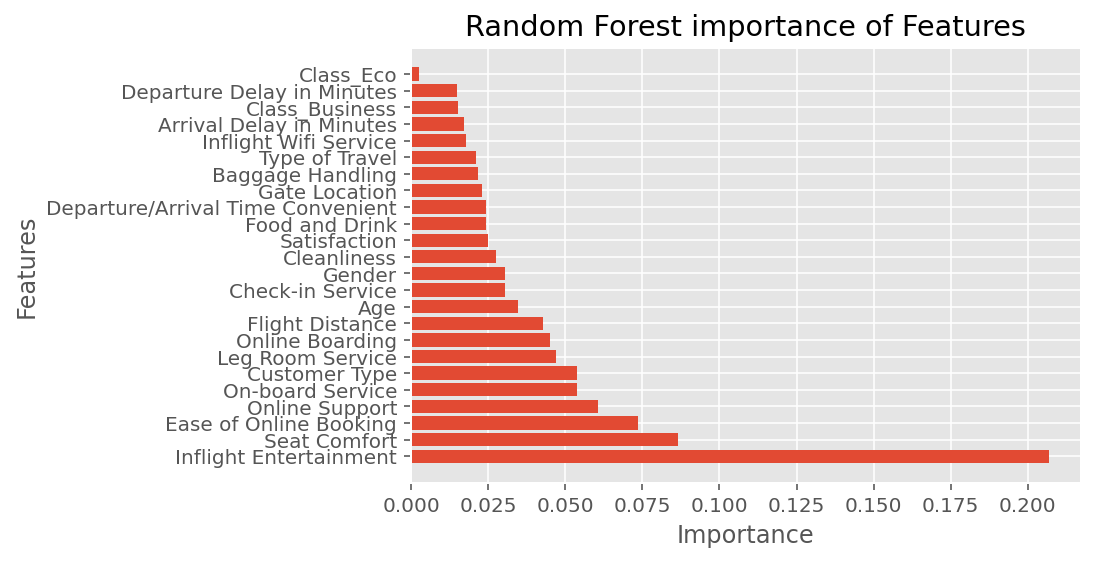

In [12]:
def importance_plot(b_feat, score, method):   
    plt.barh(b_feat, score)
    plt.title(method+ ' importance of Features')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

importance_plot(best_features_rfi, feat_imp, 'Random Forest')

In [13]:
# Top 15 features by importance
feats = ['Inflight Entertainment', 'Ease of Online Booking', 'Seat Comfort',
       'Online Support', 'Leg Room Service', 'Customer Type',
       'Flight Distance', 'On-board Service', 'Age', 'Online Boarding',
       'Check-in Service', 'Cleanliness', 'Gender', 'Baggage Handling',
       'Food and Drink']

In [14]:
from sklearn.model_selection import train_test_split

d_sample = airplane_df.drop("Satisfaction", axis = 1).values 
d_target = airplane_df['Satisfaction'].values

d_train, d_test, t_train, t_test = train_test_split(d_sample, d_target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = d_target)

print(d_train.shape)
print(d_test.shape)

(3500, 24)
(1500, 24)


## KNN

In [15]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV       

cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [16]:

from sklearn.base import BaseEstimator, TransformerMixin

# function for random forest importance inside a pipeline
# unsing n_estimor = 100
class RF_Feat_Selector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=15):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RF_Feat_Selector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 15, 20, 24],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [0.5, 1, 2, 5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [17]:
len(d_target)

5000

In [18]:
gs_pipe_KNN.fit(d_train, t_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
print(f'Best Params: {gs_pipe_KNN.best_params_}')
print(f'Best Score: {gs_pipe_KNN.best_score_}')

Best Params: {'knn__n_neighbors': 10, 'knn__p': 1, 'rfi_fs__n_features_': 20}
Best Score: 0.7734134722187939


In [ ]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
38,0.773413,0.012425,0.787253,0.750627,10.0,1.0,20.0
22,0.770596,0.012012,0.786126,0.754116,5.0,1.0,20.0
37,0.763639,0.013350,0.784978,0.743498,10.0,1.0,15.0
54,0.762977,0.014281,0.784061,0.742515,15.0,1.0,20.0
21,0.757926,0.007453,0.771752,0.751368,5.0,1.0,15.0


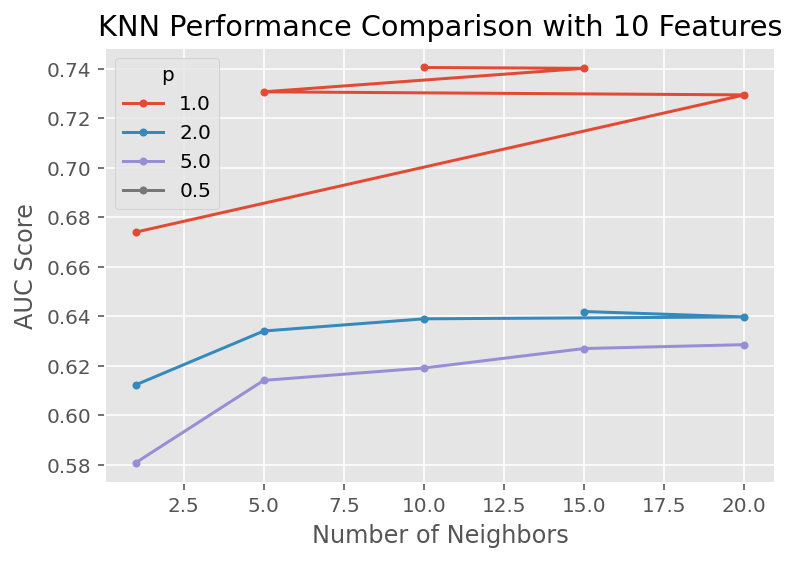

In [ ]:
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

for i in results_KNN_10_features['knn__p'].unique():
    temp = results_KNN_10_features[results_KNN_10_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison with 10 Features")
plt.show()

## Naive Bayes (NB) (Gaussian)

In [ ]:
from sklearn.preprocessing import PowerTransformer
d_train_transformed = PowerTransformer().fit_transform(d_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(d_train_transformed, t_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                             ('nb', GaussianNB())]),
                   n_iter=20, n_jobs=-2,
                   param_distributions={'nb__var_smoothing': array([1.00000000e+01, 9.54771611e+00, 9.11588830e+00, 8.70359136e+00,
       8.30994195e+00, 7.93409667e+00, 7.57525026e+00, 7.23263390e+00,
       6.90...
       2.40940356e-03, 2.30043012e-03, 2.19638537e-03, 2.09704640e-03,
       2.00220037e-03, 1.91164408e-03, 1.82518349e-03, 1.74263339e-03,
       1.66381689e-03, 1.58856513e-03, 1.51671689e-03, 1.44811823e-03,
       1.38262217e-03, 1.32008840e-03, 1.26038293e-03, 1.20337784e-03,
       1.14895100e-03, 1.09698580e-03, 1.04737090e-03, 1.00000000e-03]),
                                        'rfi_fs__n_features_': [5, 10, 15, 20,
                                                                24]},
      

In [ ]:
print(f'Best Params: {gs_pipe_NB.best_params_}')
print(f'Best Score: {gs_pipe_NB.best_score_}')
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

Best Params: {'rfi_fs__n_features_': 24, 'nb__var_smoothing': 0.08504489341802678}
Best Score: 0.9279786735122061


,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
15,0.927979,0.008873,0.938267,0.915591,24.0,0.085045
0,0.923908,0.009359,0.937600,0.910769,20.0,0.651734
7,0.923346,0.010230,0.939032,0.911905,15.0,0.004398
8,0.922364,0.008694,0.937008,0.912382,15.0,0.021215
1,0.922359,0.008803,0.932351,0.909066,24.0,1.499268


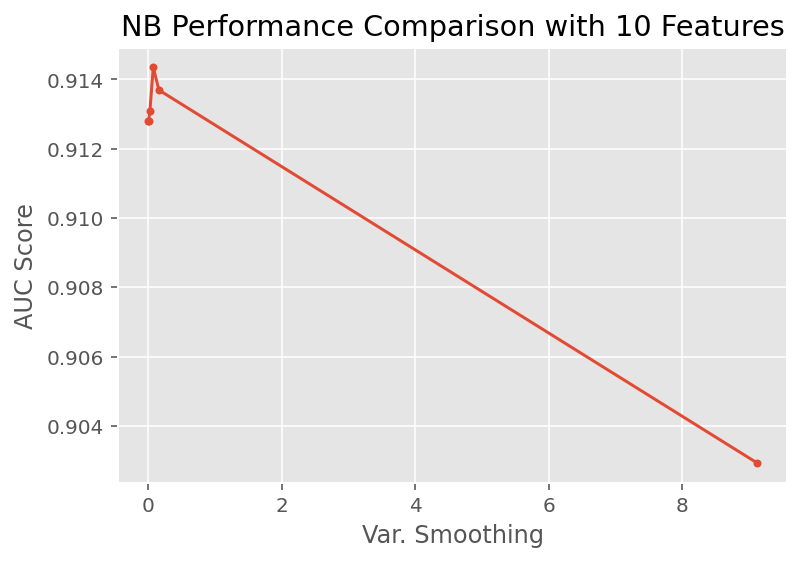

In [ ]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_10_features['nb__var_smoothing'], results_NB_10_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 10 Features")
plt.show()

## Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RF_Feat_Selector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'dt__max_depth': [3, 4, 5, 10],
                  'dt__min_samples_split': [1, 2, 5, 10]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(d_train, t_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=111))]),
             n_jobs=-2,
             param_grid={'dt__max_depth': [3, 4, 5, 10],
                         'dt__min_samples_split': [1, 2, 5, 10],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [ ]:
print(f'Best Params: {gs_pipe_DT.best_params_}')
print(f'Best Score: {gs_pipe_DT.best_score_}')
results_DT = get_search_results(gs_pipe_DT)
results_DT_5_features = results_DT[results_DT['rfi_fs__n_features_'] == 5.0]

Best Params: {'dt__max_depth': 10, 'dt__min_samples_split': 10, 'rfi_fs__n_features_': 5}
Best Score: 0.9426315832777956


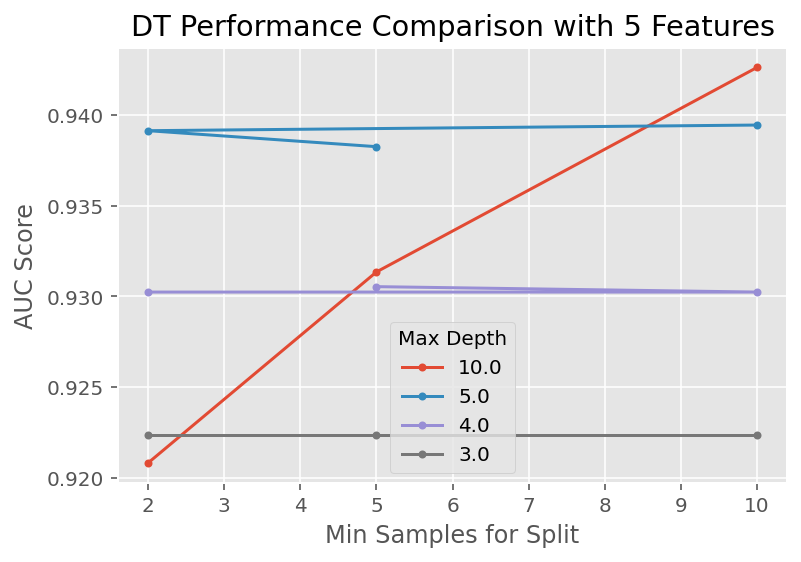

In [ ]:
for i in results_DT_5_features['dt__max_depth'].unique():
    temp = results_DT_5_features[results_DT_5_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 5 Features")
plt.show()

## Linear Regeression (LR)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score


reg = LinearRegression()

pipe_LR = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('lr', LinearRegression())])


params_pipe_LR = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'fit_intercept'   : [True, False]}



gs_pipe_LR = GridSearchCV(estimator=pipe_LR, 
                          param_grid=params_pipe_LR, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 




In [ ]:
gs_pipe_LR.fit(d_train, t_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter fit_intercept for estimator Pipeline(steps=[('rfi_fs', RF_Feat_Selector()), ('lr', LinearRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print(f'Best Params: {gs_pipe_LR.best_params_}')
print(f'Best Score: {gs_pipe_LR.best_score_}')
results_LR = get_search_results(gs_pipe_LR)
results_LR.head()

# SVM

In [ ]:
from sklearn.svm import SVC
 

pipe_SVM = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('svm', SVC())])


params_pipe_SVM = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                    'C': [0.1, 1, 10, 100, 1000],
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'kernel': ['rbf', 'linear', 'poly'],
                    'shrinking': [True, False]}


 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

gs_pipe_SVM = GridSearchCV(estimator=pipe_SVM, 
                           param_grid=params_pipe_SVM, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 
 
gs_pipe_SVM.fit(d_train, t_train)

In [ ]:
print(f'Best Params: {gs_pipe_SVM.best_params_}')
print(f'Best Score: {gs_pipe_SVM.best_score_}')

results_SVM = get_search_results(gs_pipe_SVM)
results_SVM.head()

#### **Neural Network Model Fitting & Tuning** <a name="MC"></a>

things to tune: the number of neurons, activation function, optimizer, learning rate, batch size,  epochs , dropoutrate

In [ ]:
def model_factory(input_dim, layer1_units, layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units, activation=layer1_activation))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1, activation=output_activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [ ]:
# define plot function for the fit
# we will plot the accuracy here
def plot_history(history): 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()

In [ ]:
# BASELINE MODEL
# # size of the network is determined by the number of neural units in each hidden layer
layer1_units = 25
layer2_units = 25

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier

loss = 'binary_crossentropy' 
# during training, we would like to monitor accuracy
metrics = ['accuracy'] 

epochs = 500
batch_size = 100

layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00

learning_rate=0.01
decay=1e-6
momentum=0.5

# SGD stands for stochastic gradient descent
optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum)

In [ ]:
model = KerasClassifier(build_fn=model_factory(d_train.shape[1], layer1_units, layer2_units), verbose=-1)

In [ ]:

epochs = [10, 50, 100]
param_grid = dict(epochs=epochs)
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
grid = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=cv_method,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1) 

In [ ]:

grid_result = grid.fit(d_train, t_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
%%time
history_test = model_test.fit(d_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0, # set to 1 for iteration details, 0 for no details
                              shuffle=True,
                              validation_data=(d_test, t_test))

Wall time: 56.7 s


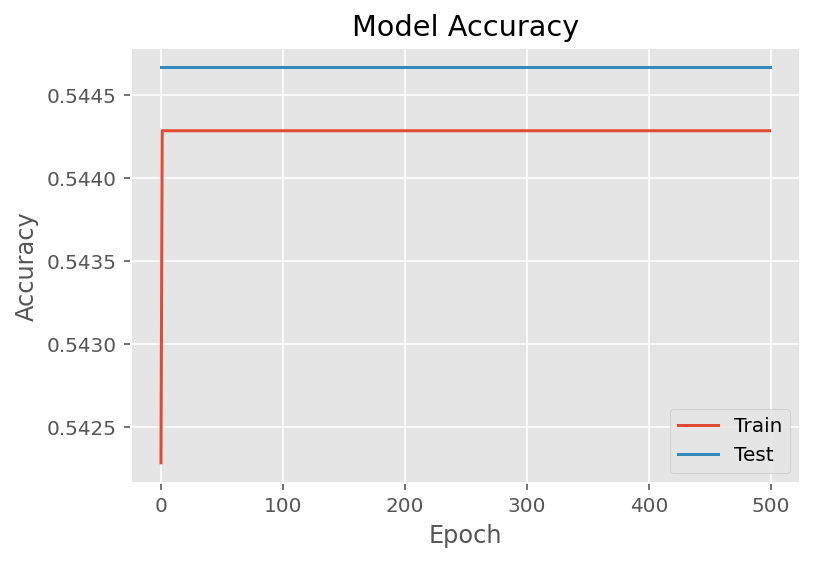

In [ ]:
plot_history(history_test)

Eval

In [ ]:
# compute prediction performance on test data
model_output = model_test.predict(d_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(model_output < 0.5, 0, 1)

# set up the results data frame
result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred
# residuals will be relevant for regression problems
# result_test['abs_residual'] = np.abs(result_test['target'] - result_test['fit'])
result_test.head()

,target,fit
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1


In [ ]:
acc = accuracy_score(result_test['target'], result_test['fit'])
auc = roc_auc_score(result_test['target'], result_test['fit'])
print(f"validation data accuracy_score = {acc:.3f}")
print(f"validation data roc_auc_score = {auc:.3f}")

validation data accuracy_score = 0.545
validation data roc_auc_score = 0.500


##### **Model Comparison** <a name="MC"></a>

<span style='font-family:"Times New Roman"'> 

### Summary & conclusion: <a name="sum"></a>
<span styel=''>

<span style='font-family:"Times New Roman"'> 

### References: <a name="ref"></a>
<span styel=''>

In [ ]:
"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/" # Discretization    

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/'